In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import json
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from datetime import datetime
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath('../'))
from data import Data

In [3]:
d = Data()

In [ ]:
playlistDataDF = d.loadFormattedPlaylists(1000)

In [11]:
d.savePlaylistDf(playlistDataDF)

In [4]:
playlistDataDF = d.loadPlaylistDf()

In [5]:
playlistDataDF.shape

(1000000, 13)

In [6]:
type(playlistDataDF)

pandas.core.frame.DataFrame

In [5]:
playlistDataDF.head(10)

,num_artists,num_albums,num_tracks,num_followers,num_edits,modified_at,modified_at_month,modified_at_year,modified_at_day,duration_ms,duration_sec,duration_min,collaborative
0,37,47,52,1,6,1493424000,4,2017,29,11532414,11532.414,192.206900,false
1,21,23,39,1,5,1506556800,9,2017,28,11656470,11656.470,194.274500,false
2,31,51,64,1,18,1505692800,9,2017,18,14039958,14039.958,233.999300,false
3,86,107,126,1,4,1501027200,7,2017,26,28926058,28926.058,482.100967,false
4,16,16,17,2,7,1401667200,6,2014,2,4335282,4335.282,72.254700,false
5,56,71,80,1,3,1430956800,5,2015,7,19156557,19156.557,319.275950,false
6,13,15,16,1,2,1477094400,10,2016,22,3408479,3408.479,56.807983,false
7,48,52,53,1,38,1509321600,10,2017,30,12674796,12674.796,211.246600,false
8,23,37,46,2,21,1508976000,10,2017,26,9948921,9948.921,165.815350,false
9,18,20,21,1,10,1501804800,8,2017,4,4297488,4297.488,71.624800,false


In [8]:
playlistDataDF['modified_at_day'].unique()

array([29, 28, 18, 26, 2, 7, 22, 30, 4, 8, 13, 27, 24, 9, 1, 14, 31, 21,
       17, 11, 10, 23, 20, 3, 16, 5, 19, 6, 15, 25, 12], dtype=object)

In [ ]:
trackDataDF = d.loadFormattedTracks(5)

In [25]:
trackDataDF.head()

,album_name,album_uri,artist_name,artist_uri,duration_ms,pos,track_name,track_uri,duration_min
0,The Cookbook,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,226863,0,Lose Control (feat. Ciara & Fat Man Scoop),spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,3.781050
1,In The Zone,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,Britney Spears,spotify:artist:26dSoYclwsYLMAKD3tpOr4,198800,1,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,3.313333
2,Dangerously In Love (Alben für die Ewigkeit),spotify:album:25hVFAxTlDvXbx2X2QkUkE,Beyoncé,spotify:artist:6vWDO969PvNqNYHIOW5v0m,235933,2,Crazy In Love,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,3.932217
3,Justified,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,267266,3,Rock Your Body,spotify:track:1AWQoqb9bSvzTjaLralEkT,4.454433
4,Hot Shot,spotify:album:6NmFmPX56pcLBOFMhIiKvF,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij,227600,4,It Wasn't Me,spotify:track:1lzr43nnXAijIGYnCT8M8H,3.793333


In [23]:
trackDataDF.size

10719696

## Basic Stats

In [26]:
trackDataDF['artist_name'].describe()

count     335094
unique     24551
top        Drake
freq        4620
Name: artist_name, dtype: object

In [9]:
trackDataDF['album_name'].describe()

count     33119074
unique      437509
top          Views
freq        104556
Name: album_name, dtype: object

In [10]:
trackDataDF['track_name'].describe()

count     33119074
unique     1081685
top         Closer
freq         34105
Name: track_name, dtype: object

## Track Duration Distribution

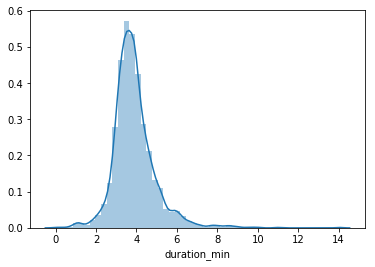

In [67]:
sns.distplot(trackDataDF['duration_min'])

## Playlist Univariate Distributions

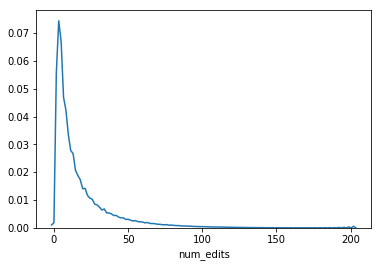

In [8]:
sns.distplot(playlistDataDF['num_edits'], hist=False)

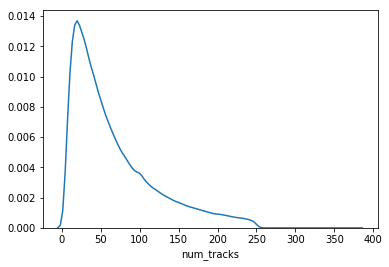

In [10]:
sns.distplot(playlistDataDF['num_tracks'], hist=False)

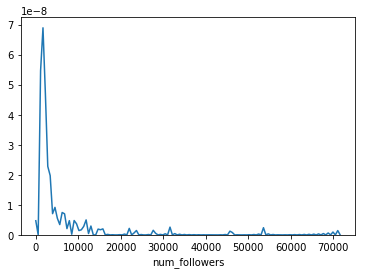

In [11]:
sns.distplot(playlistDataDF['num_followers'], hist=False)

Further analysis could be performed on playlists with only greater than less than 10000 followers and more than 10000 followers.

num_artists
194    27
195    22
196    21
197    17
198    23
199    21
200    15
201    10
202     9
203    20
204    21
205    10
206    10
207    12
208    14
209     9
210     6
211     9
212     7
213     8
214     6
215     6
216     3
217     5
218     7
219     7
220     1
221     1
222     2
223     5
224     5
225     4
227     1
228     2
229     3
230     1
231     3
232     1
234     1
238     2
dtype: int64

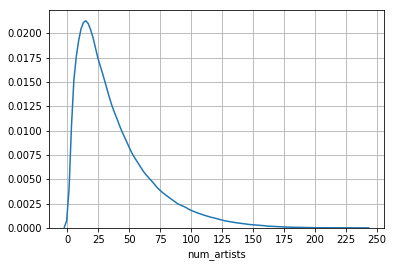

In [48]:
plt.xticks(np.arange(0, 251, 25))
plt.grid()
sns.distplot(playlistDataDF['num_artists'], hist=False)
playlistDataDF.groupby(['num_artists']).size().tail(40)

Playlists do not exist with more than 238 artists even though 250 is the maximum. 100 artists or more in a playlist is rare. 

num_albums
200    216
201    219
202    213
203    187
204    196
205    146
206    155
207    151
208    151
209    133
210    116
211    129
212    144
213     92
214     87
215    100
216     80
217     70
218     62
219     75
220     54
221     55
222     48
223     44
224     33
225     38
226     28
227     32
228     22
229     26
230     12
231     13
232      9
233     10
234     10
235      4
236      6
237      3
238      2
239      4
240      3
241      3
242      3
243      2
244      1
dtype: int64

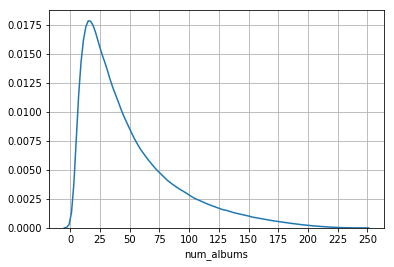

In [39]:
plt.xticks(np.arange(0, 251, 25))
plt.grid()
sns.distplot(playlistDataDF['num_albums'],  hist=False)
playlistDataDF.groupby(['num_albums']).size().tail(45)

Sharp drop in number of albums in playlists at the 212 mark. Most frequently occuring number of albums in a playlist is 15. The album and artist distributions share similar characteristics.

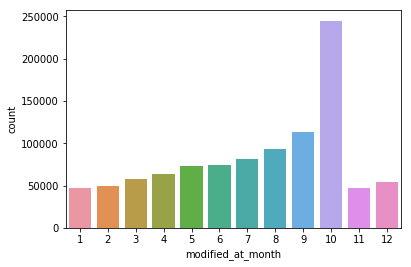

In [24]:
sns.countplot(x='modified_at_month', data=playlistDataDF)

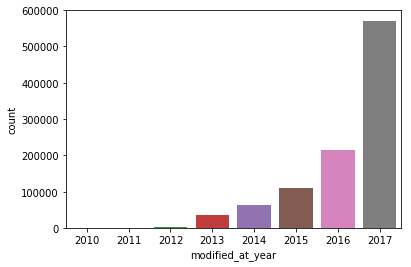

In [26]:
sns.countplot(x='modified_at_year', data=playlistDataDF)

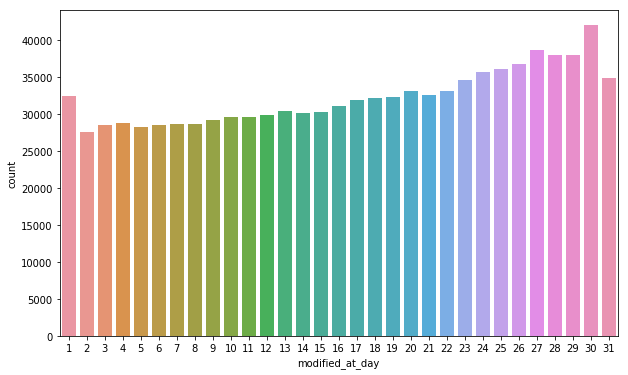

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='modified_at_day', data=playlistDataDF)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


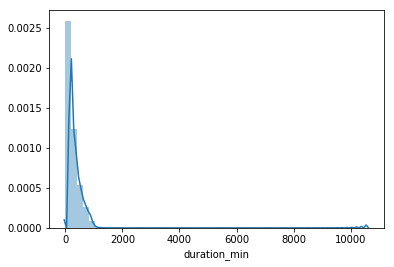

In [32]:
sns.distplot(playlistDataDF['duration_min'])

## Playlist Track Lengths

In [35]:
playlist_dist = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["num_tracks"] not in playlist_dist:
            playlist_dist[playlist["num_tracks"]] = 1
        else:
            playlist_dist[playlist["num_tracks"]]+=1

In [36]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_tracks=[t[0] for t in playlist_tuples]
playlist_nr_nr_tracks=[t[1] for t in playlist_tuples]

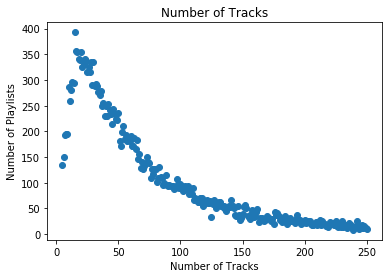

In [181]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(playlist_nr_tracks, playlist_nr_nr_tracks)
plt.title('Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits

In [38]:
playlist_dist = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["num_edits"] not in playlist_dist:
            playlist_dist[playlist["num_edits"]] = 1
        else:
            playlist_dist[playlist["num_edits"]] += 1

In [39]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits=[t[1] for t in playlist_tuples]

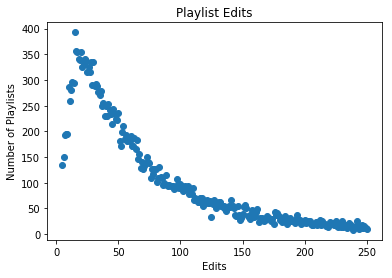

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(playlist_nr_tracks, playlist_nr_nr_tracks)
plt.title('Playlist Edits')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits (checking collaboration)

In [41]:
playlist_dist_collab_on = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'true':
            if playlist["num_edits"] not in playlist_dist_collab_on:
                playlist_dist_collab_on[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_on[playlist["num_edits"]] += 1

In [42]:
playlist_dist_collab_off = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'false':
            if playlist["num_edits"] not in playlist_dist_collab_off:
                playlist_dist_collab_off[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_off[playlist["num_edits"]] += 1

In [43]:
playlist_tuples = list(playlist_dist_collab_on.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_on=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_on=[t[1] for t in playlist_tuples]

In [44]:
playlist_tuples = list(playlist_dist_collab_off.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_off=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_off=[t[1] for t in playlist_tuples]

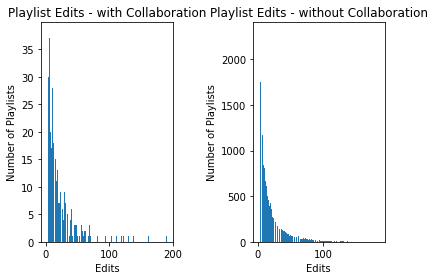

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,2,1)
ax.bar(playlist_nr_edits_on, height=playlist_nr_nr_edits_on)
plt.title('Playlist Edits - with Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

ax = fig.add_subplot(1,2,2)
ax.bar(playlist_nr_edits_off, height=playlist_nr_nr_edits_off)
plt.title('Playlist Edits - without Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

plt.tight_layout()
plt.show()

## Duration of Playlists

In [68]:
playlist_len_ms = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        playlist_len_ms.append(playlist['duration_ms'])

In [69]:
playlist_len_ms.sort()

In [70]:
playlist_len_ms
playlist_len_mins = [(x / 1000)/60 for x in playlist_len_ms] # in mins

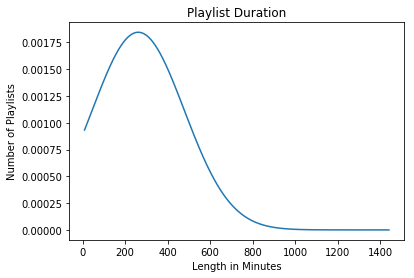

In [71]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hmean = np.mean(playlist_len_mins)
hstd = np.std(playlist_len_mins)
pdf = stats.norm.pdf(playlist_len_mins, hmean, hstd)
plt.title('Playlist Duration')
plt.xlabel('Length in Minutes')
plt.ylabel('Number of Playlists')

plt.plot(playlist_len_mins, pdf) # including h here is crucial

## Artists

In [165]:
nr_artists = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        nr_artists.append(playlist['num_artists'])

In [166]:
nr_artists.sort()

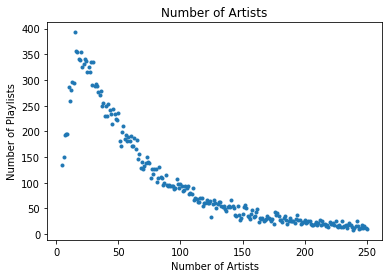

In [169]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(playlist_nr_tracks, playlist_nr_nr_tracks, marker='.')
plt.title('Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Playlists')
plt.show()

## Artists vs. Tracks

In [171]:
artists_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        artists_v_tracks.append((playlist['num_artists'], playlist['num_tracks']))

In [172]:
artists_v_tracks.sort(key=lambda tup: tup[1]) # sort by nr of tracks per playlist

In [173]:
nr_artists=[t[0] for t in artists_v_tracks]
nr_tracks=[t[1] for t in artists_v_tracks]

In [178]:
nr_artists_avg = movingaverage(nr_artists, 500)

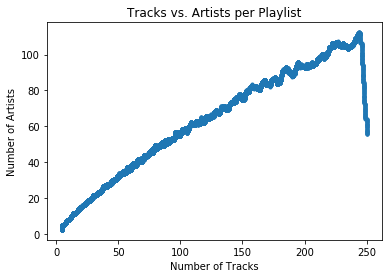

In [179]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nr_tracks, nr_artists_avg, marker='.')
plt.title('Tracks vs. Artists per Playlist')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Artists')
plt.show()

## Artists vs. Albums

In [8]:
artists_v_albums = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        artists_v_albums.append((playlist['num_artists'], playlist['num_albums']))

In [9]:
artists_v_albums.sort(key=lambda tup: tup[0]) # sort by nr of artists per playlist

In [10]:
nr_artists=[t[0] for t in artists_v_albums]
nr_albums=[t[1] for t in artists_v_albums]

In [11]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [24]:
nr_albums_av = movingaverage(nr_albums, 2)

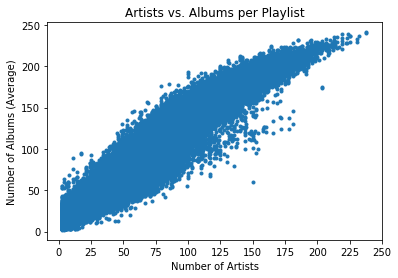

In [25]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nr_artists, nr_albums_av, marker='.')
plt.title('Artists vs. Albums per Playlist')
ax.set_xticks(np.arange(0, 251, 25))
plt.xlabel('Number of Artists')
plt.ylabel('Number of Albums')
plt.show()

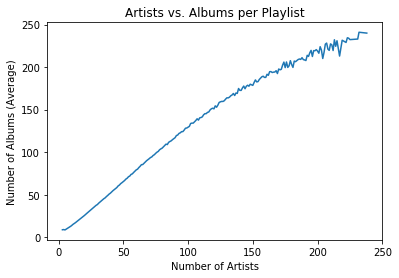

In [40]:
ax.set_xticks(np.arange(0, 251, 25))
plt.title('Artists vs. Albums per Playlist')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Albums (Average)')
plt.plot(playlistDataDF.groupby(['num_artists'])['num_albums'].mean())

Close to linear relationship as expected between number of artists and albums on average. More noise towards the higher range due to lack of data points (see number of artists univariate distribution) compared to smooth line in the lower ranges.

## Last Modified Time (Month) vs. Number of Tracks

In [112]:
time_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        time_v_tracks.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%m')), playlist['num_tracks']))

In [ ]:
time_v_tracks.sort(key=lambda tup: tup[0]) # sort by month

In [115]:
months = [i for i in range(1, 13)]
monthly_avg = []
for i in range(1, 13):
    total=0
    nr=0
    for tvt in time_v_tracks:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    monthly_avg.append(total/nr) 

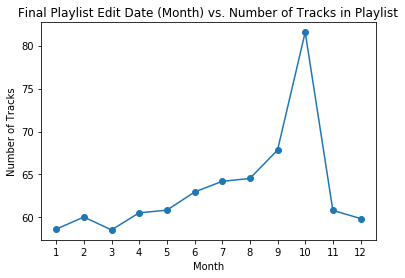

In [149]:
plt.plot(months, monthly_avg, '-o')
plt.title('Final Playlist Edit Date (Month) vs. Number of Tracks in Playlist')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('Number of Tracks')
plt.show()

Clear rise in number of tracks in playlists where edits were stopped in October. And a general rise towards the end of the year.

## Last Modified Time (Year) vs. Number of Tracks

In [38]:
time_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        time_v_tracks.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%Y')), playlist['num_tracks']))

In [39]:
years=[t[0] for t in time_v_tracks]
set(years)

{2011, 2012, 2013, 2014, 2015, 2016, 2017}

In [40]:
years = [i for i in range(2011, 2018)]
yearly_avg = []
for i in range(2011, 2018):
    total=0
    nr=0
    for tvt in time_v_tracks:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    yearly_avg.append(total/nr) 

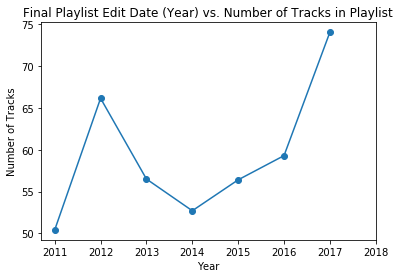

In [41]:
plt.plot(years, yearly_avg, '-o')
plt.title('Final Playlist Edit Date (Year) vs. Number of Tracks in Playlist')
plt.xlabel('Year')
plt.xticks(np.arange(2011, 2019, 1.0))
plt.ylabel('Number of Tracks')
plt.show()

Not a general rise in playlist length against years. Sharp drop in 2014 with 2017 (the most recent year in the dataset) with the most tracks in playlists. The more recent last edits such as in 2017 could be playlists maintained over several years.

## Followers vs. Number of Tracks

In [37]:
followers_v_nr_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_nr_tracks.append((playlist['num_tracks'], playlist['num_followers']))

In [38]:
followers_v_nr_tracks.sort(key=lambda tup: tup[0]) # sort by nr tracks

In [39]:
nr_tracks=[t[0] for t in followers_v_nr_tracks]
nr_followers=[t[1] for t in followers_v_nr_tracks]

In [48]:
from math import log
nr_followers_av = movingaverage(nr_followers, 3000)

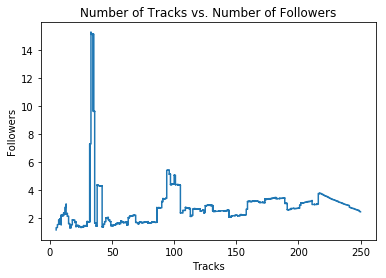

In [85]:
plt.plot(nr_tracks, nr_followers_av)
plt.title('Number of Tracks vs. Number of Followers')
plt.xlabel('Tracks')
plt.ylabel('Followers')
plt.show()

A few playlists with significantly higher followers drive the averages up in the 35-40 range. An order of magnitude increase in track length in playlists indicate 1-2 more followers higher as a general trend.

## Followers vs. Time (Month and Year)

In [104]:
followers_v_month = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_month.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%m')), playlist['num_followers']))

In [105]:
followers_v_year = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_year.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%Y')), playlist['num_followers']))

In [106]:
months = [i for i in range(1, 13)]
monthly_avg = []
for i in range(1, 13):
    total=0
    nr=0
    for tvt in followers_v_month:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    monthly_avg.append(total/nr) 

In [107]:
years = [i for i in range(2011, 2018)]
yearly_avg = []
for i in range(2011, 2018):
    total=0
    nr=0
    for tvt in followers_v_year:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    yearly_avg.append(total/nr) 

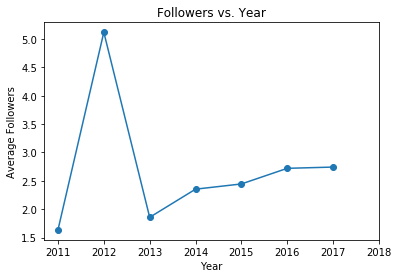

In [108]:
plt.plot(years, yearly_avg, '-o')
plt.title('Followers vs. Year')
plt.xlabel('Year')
plt.xticks(np.arange(2011, 2019, 1.0))
plt.ylabel('Average Followers')
plt.show()

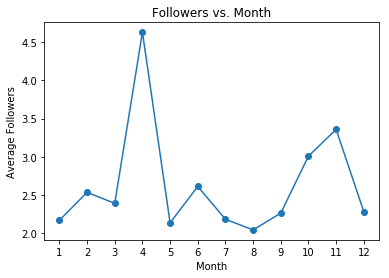

In [109]:
plt.plot(months, monthly_avg, '-o')
plt.title('Followers vs. Month')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('Average Followers')
plt.show()

A small number of playlists with very high follower counts drive the average for April and 2012 up.

## Followers vs. Number of Edits

In [65]:
followers_v_edits = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_edits.append((playlist['num_edits'], playlist['num_followers']))

In [67]:
followers_v_edits.sort(key=lambda tup: tup[0]) # sort by edits

In [68]:
nr_edits=[t[0] for t in followers_v_edits]
nr_followers=[t[1] for t in followers_v_edits]

In [76]:
nr_followers_av = movingaverage(nr_followers, 4000)

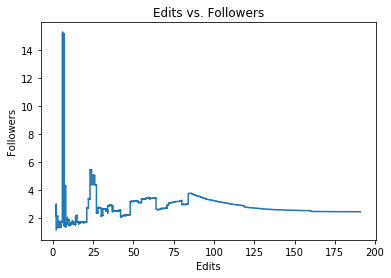

In [81]:
plt.plot(nr_edits, nr_followers_av)
plt.title('Edits vs. Followers')
plt.xlabel('Edits')
plt.ylabel('Followers')
plt.show()

## Followers vs. Number of Artists

In [101]:
followers_v_artists = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_artists.append((playlist['num_artists'], playlist['num_followers']))

In [102]:
followers_v_artists.sort(key=lambda tup: tup[0]) # sort by nr artists

In [103]:
nr_artists=[t[0] for t in followers_v_artists]
nr_followers=[t[1] for t in followers_v_artists]

In [104]:
nr_followers_av = movingaverage(nr_followers, 5000)

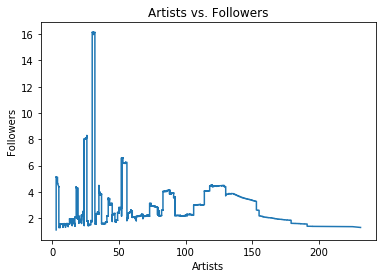

In [105]:
plt.plot(nr_artists, nr_followers_av)
plt.title('Artists vs. Followers')
plt.xlabel('Artists')
plt.ylabel('Followers')
plt.xticks(np.arange(0, 250, 50))
plt.show()

## Correlation Matrix

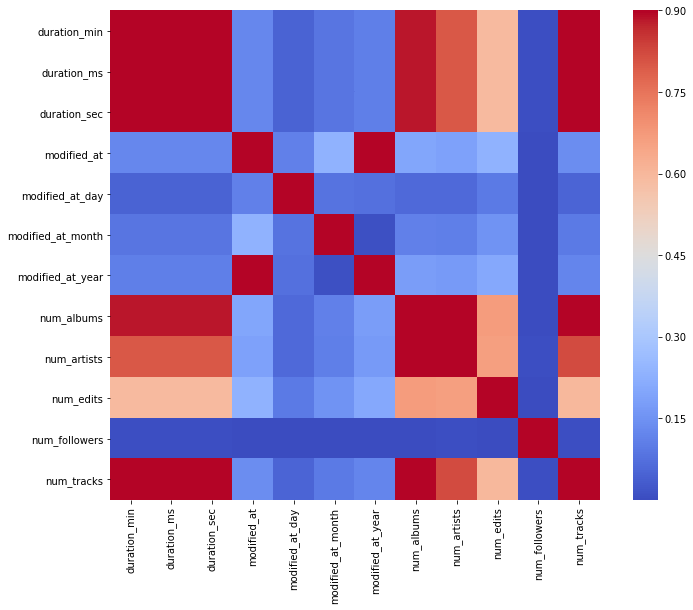

In [110]:
#correlation matrix
corrmat = playlistDataDF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True, cmap='coolwarm');

Number of followers do not correlate strongly with any other attribute -- only slightly more against number of artists.

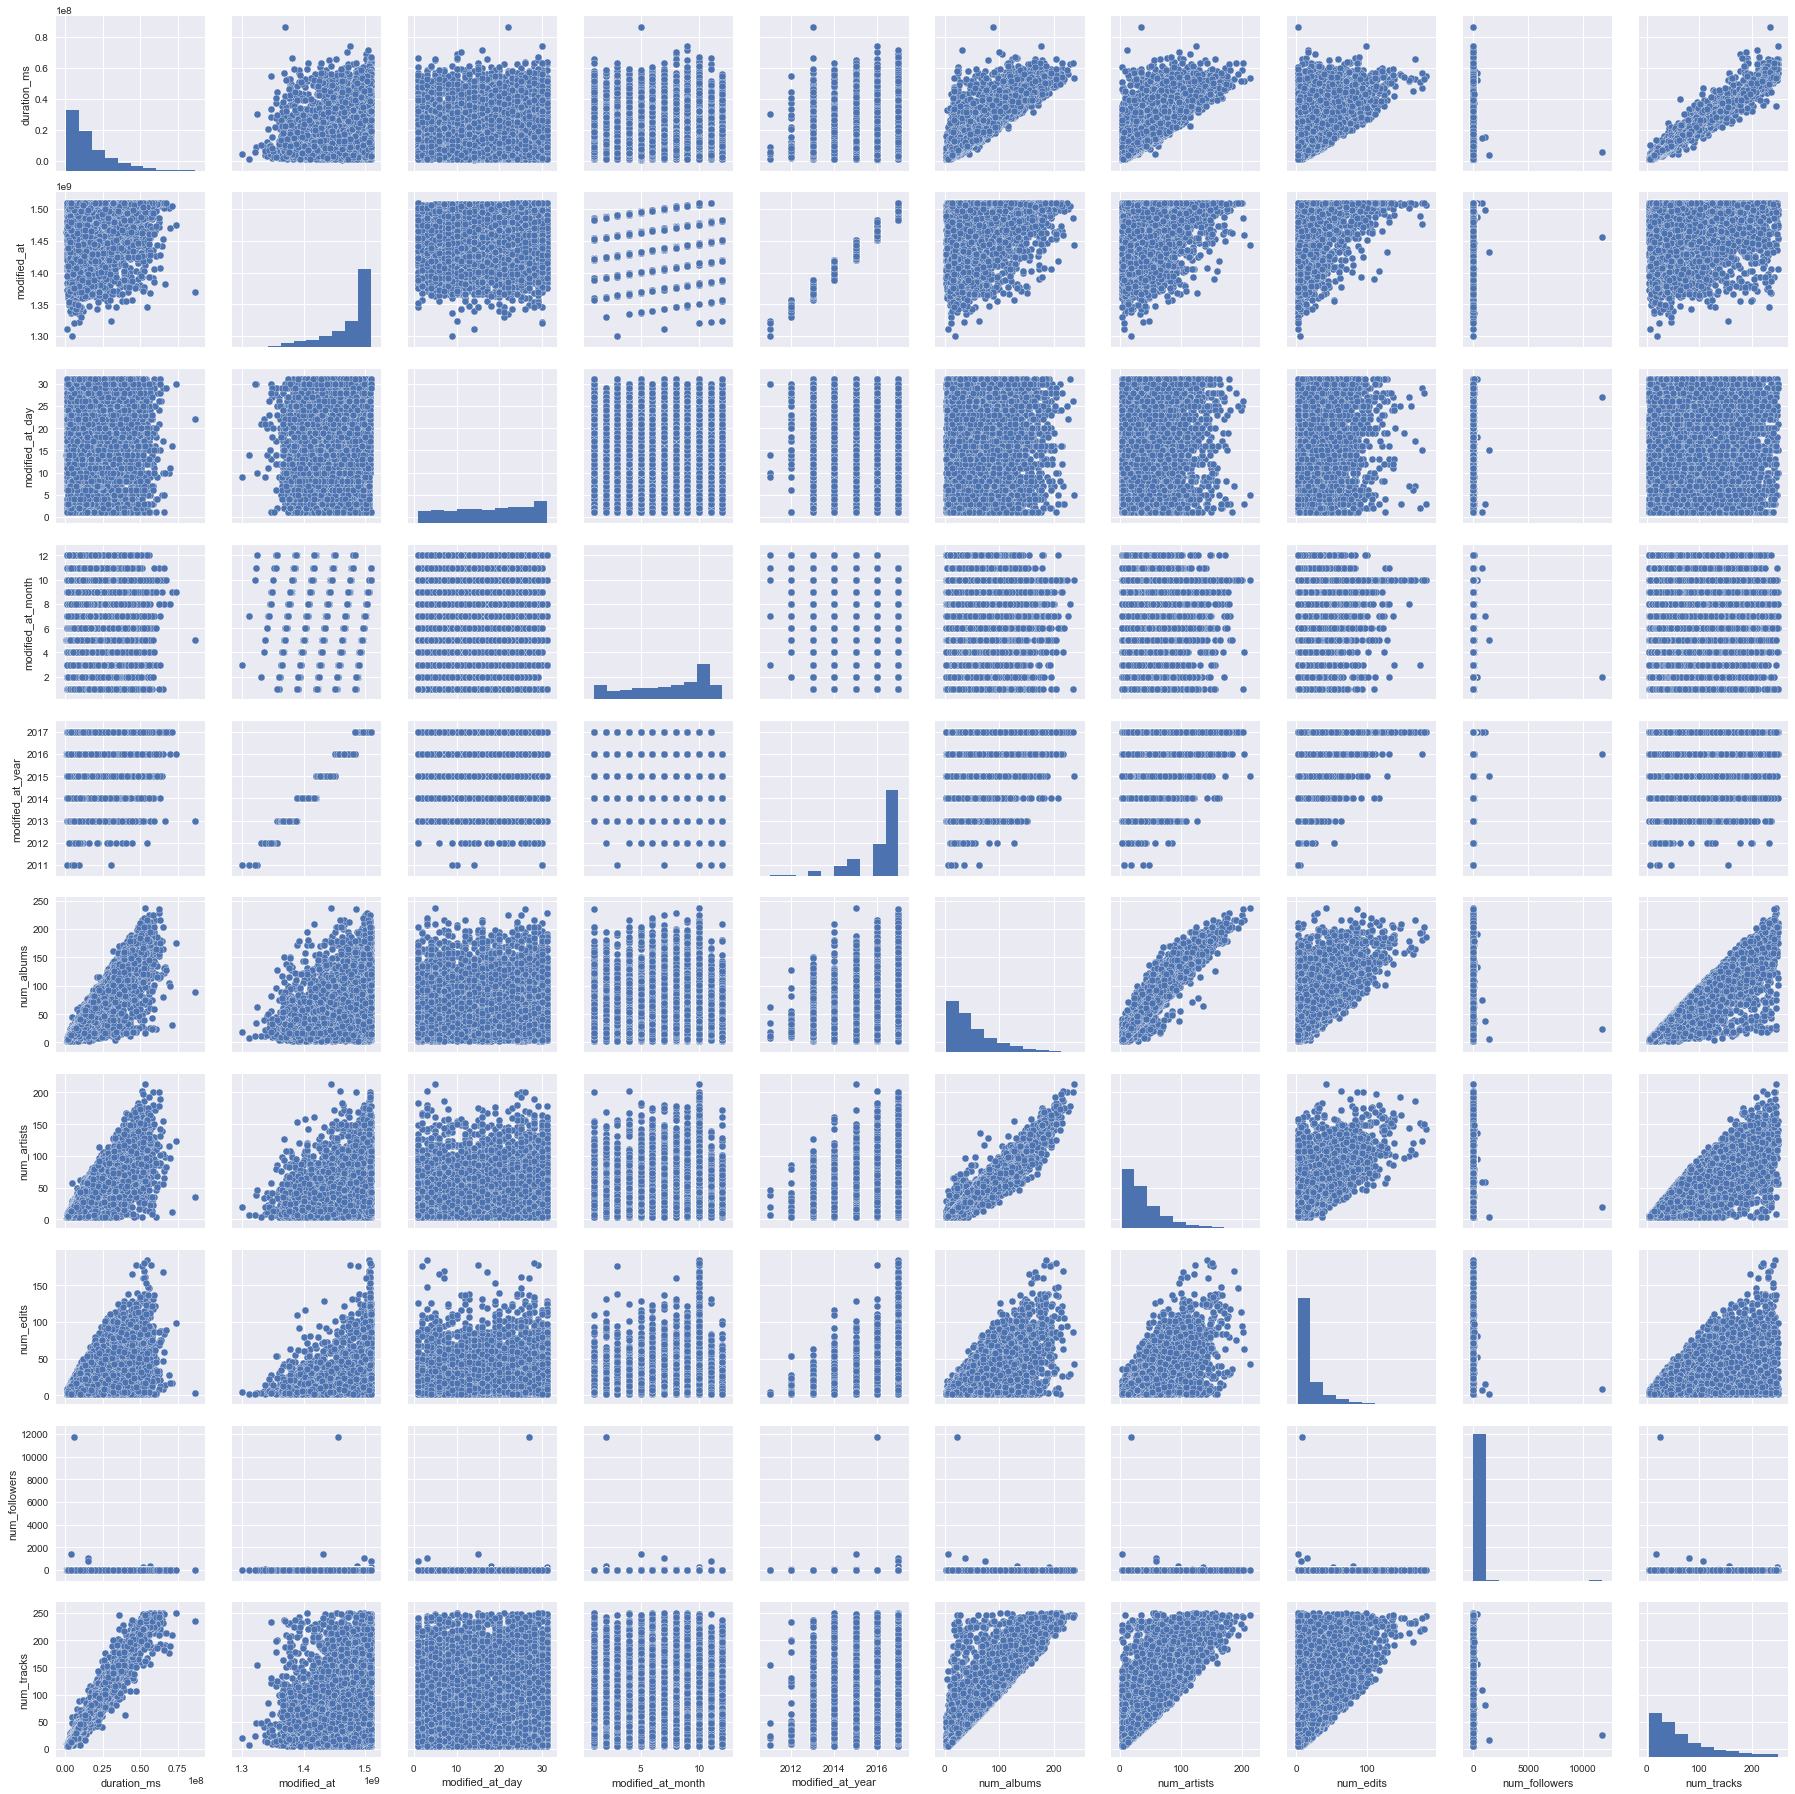

In [159]:
sns.set()
sns.pairplot(playlistDataDF[list(playlistDataDF.columns.values)], size = 2.5)
plt.show()

## Collaborative vs. Other Attributes

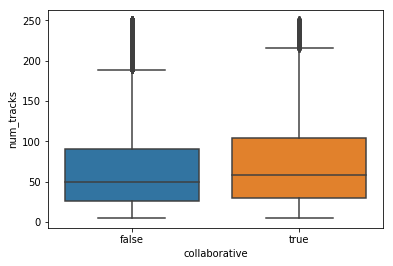

In [111]:
sns.boxplot(x="collaborative", y="num_tracks", data=playlistDataDF)

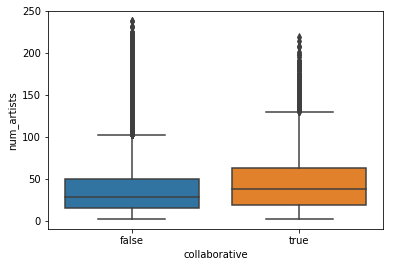

In [112]:
sns.boxplot(x="collaborative", y="num_artists", data=playlistDataDF)

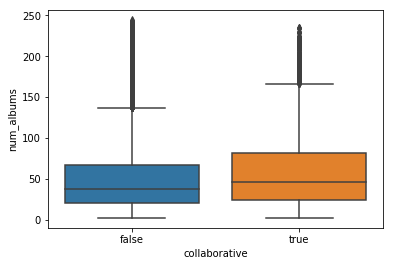

In [113]:
sns.boxplot(x="collaborative", y="num_albums", data=playlistDataDF)

More than one user editing a playlist contributes to more unique artists, albums and tracks as one would expect. 

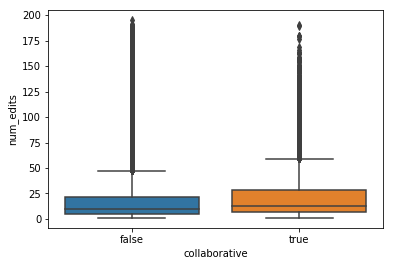

In [114]:
sns.boxplot(x="collaborative", y="num_edits", data=playlistDataDF)

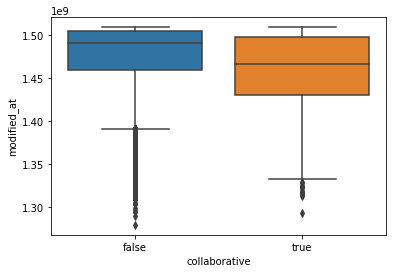

In [115]:
sns.boxplot(x="collaborative", y="modified_at", data=playlistDataDF)

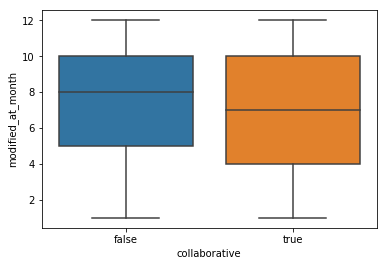

In [117]:
sns.boxplot(x="collaborative", y="modified_at_month", data=playlistDataDF)

## Playlist Year vs. Month

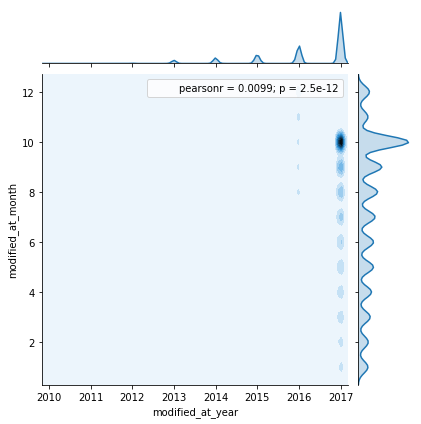

In [126]:
sns.jointplot(playlistDataDF['modified_at_year'], playlistDataDF['modified_at_month'], kind="kde")

## Playlist Month vs. Day

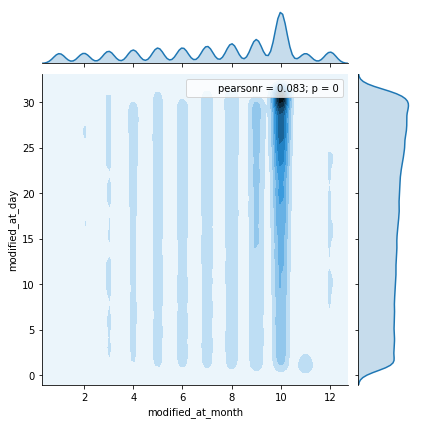

In [127]:
sns.jointplot(playlistDataDF['modified_at_month'], playlistDataDF['modified_at_day'], kind="kde")

It is not clear why the later months and days receive higher numbers of last edit counts.